In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')  # curse of dmen

In [207]:
df=pd.read_excel('C:\\Users\\USER\Desktop\\Naresh it\\mynotes\\ml\\flight fair price\\Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [209]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [210]:
df.dropna(inplace=True,axis=0)

In [211]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## EDA

In [212]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [213]:
#  we have journey date that column we con make 2 individual columans like journey day journey month 
df['Date_of_Journey']=pd.to_datetime(df.Date_of_Journey)   # obj data type is converted in to date time
df['Day_of_Journey']=df['Date_of_Journey'].dt.day
df['Month_of_Journey']=df['Date_of_Journey'].dt.month
df.drop('Date_of_Journey',axis=1,inplace=True)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Dep_Time          10682 non-null  object
 5   Arrival_Time      10682 non-null  object
 6   Duration          10682 non-null  object
 7   Total_Stops       10682 non-null  object
 8   Additional_Info   10682 non-null  object
 9   Price             10682 non-null  int64 
 10  Day_of_Journey    10682 non-null  int32 
 11  Month_of_Journey  10682 non-null  int32 
dtypes: int32(2), int64(1), object(9)
memory usage: 1001.4+ KB


In [215]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [216]:
df['Dep_hour']=pd.to_datetime(df.Dep_Time).dt.hour
df['Dep_min']=pd.to_datetime(df.Dep_Time).dt.minute
df.drop('Dep_Time',axis=1,inplace=True)

In [217]:
df['Arrival_hour']=pd.to_datetime(df.Arrival_Time).dt.hour
df['Arrival_min']=pd.to_datetime(df.Arrival_Time).dt.minute
df.drop('Arrival_Time',axis=1,inplace=True)

In [218]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [219]:
duration_list=list(df.Duration.values)
l1=[]
for duration in duration_list:
    duration=duration.split()
    if len(duration)!=2:
        if 'h' in ''.join(duration):
            l1.append(''.join(duration)+' '+'0m')
        else:
            l1.append('0h'+' '+''.join(duration))
    else:
        l1.append(' '.join(duration))
df['Duration']=l1
df['Duration_Hour']=df.Duration.str.replace('h','').str.replace('m','').str.split().str[0].astype(int)
df['Duration_min']=df.Duration.str.replace('h','').str.replace('m','').str.split().str[1].astype(int)
df['Duration_in_min']=df.Duration_Hour*60+df.Duration_min
df.drop(['Duration_Hour','Duration_min','Duration','Route'],axis=1,inplace=True)

In [220]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,445


# Handling categorical data
- nominal encoding
  - data are not in any order  ex: one heart encoder
- ordianal encodi
  - data should follow order  ex: one heart encoder

In [221]:
df.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [222]:
summary = df.groupby('Airline')['Price'].describe()
summary

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Air Asia,319.0,5590.260188,2027.362290,3383.0,4282.0,5162.0,6451.00,13774.0
Air India,1751.0,9612.427756,3901.734561,2050.0,6891.0,9443.0,12219.00,31945.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
IndiGo,2053.0,5673.682903,2264.142168,2227.0,4226.0,5000.0,6494.00,22153.0
Jet Airways,3849.0,11643.923357,4258.940578,1840.0,9134.0,11467.0,14151.00,54826.0
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.0,54747.0,61122.50,79512.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.0,11269.0,11269.00,14629.0
SpiceJet,818.0,4338.284841,1849.922514,1759.0,3574.5,3873.0,4760.00,23267.0


<Figure size 2000x1000 with 0 Axes>

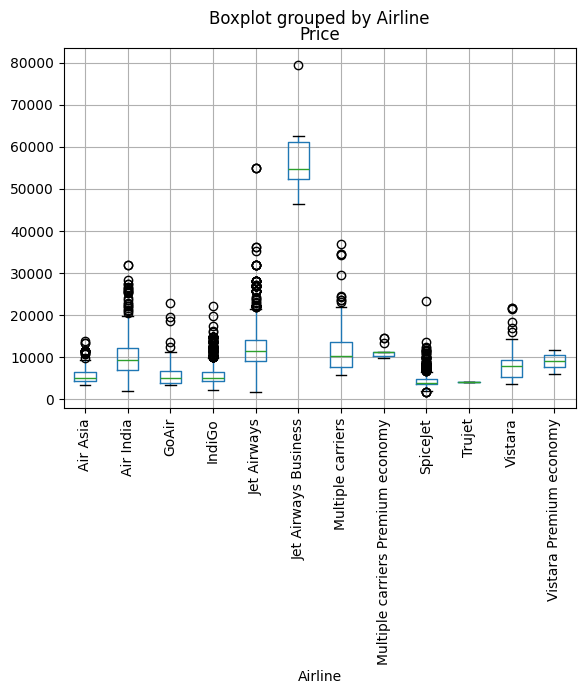

In [223]:
plt.figure(figsize=(20,10))
df.boxplot(column='Price', by='Airline')
plt.xticks(rotation=90)
plt.show()

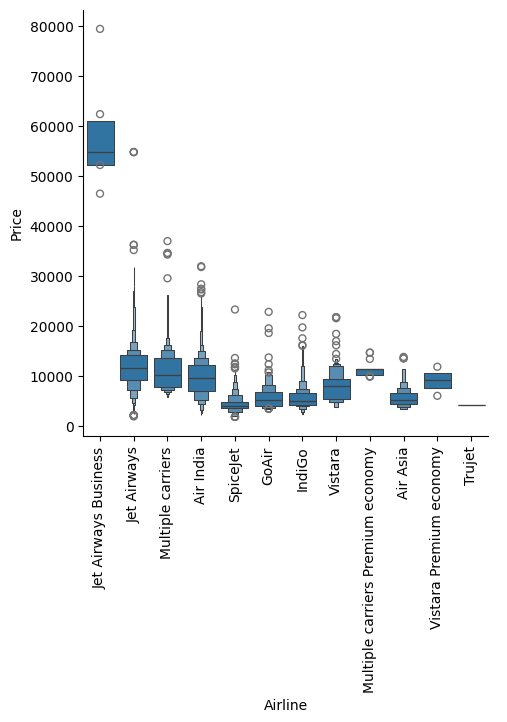

In [224]:
sns.catplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')
plt.xticks(rotation=90)
plt.show()

- we are observing 'Jet Airways Business' has more price compare with other airlines.
- It is a nominal so we do one heart encoding.

In [225]:
Airline_dict=dict(df.Airline.value_counts())
Airline_dict

{'Jet Airways': 3849,
 'IndiGo': 2053,
 'Air India': 1751,
 'Multiple carriers': 1196,
 'SpiceJet': 818,
 'Vistara': 479,
 'Air Asia': 319,
 'GoAir': 194,
 'Multiple carriers Premium economy': 13,
 'Jet Airways Business': 6,
 'Vistara Premium economy': 3,
 'Trujet': 1}

In [226]:
df['Airline']=df['Airline'].map(Airline_dict)

In [227]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_min
0,2053,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,170
1,1751,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,445


In [228]:
df.Source.value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [229]:
Source=pd.get_dummies(df[['Source']],dtype=int)
Source

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10678,0,0,0,1,0
10679,0,0,0,1,0
10680,1,0,0,0,0
10681,1,0,0,0,0


In [230]:
df.Destination.value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [231]:
df['Destination']=np.where(df.Destination=='New Delhi','Delhi',df.Destination)
Destination=pd.get_dummies(df[['Destination']],dtype=int)
Destination

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,0,1,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
10678,1,0,0,0,0
10679,1,0,0,0,0
10680,0,0,1,0,0
10681,0,0,1,0,0


In [232]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_min
0,2053,Banglore,Delhi,non-stop,No info,3897,24,3,22,20,1,10,170
1,1751,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,445
2,3849,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,1140
3,2053,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,325
4,2053,Banglore,Delhi,1 stop,No info,13302,1,3,16,50,21,35,285


In [233]:
df.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

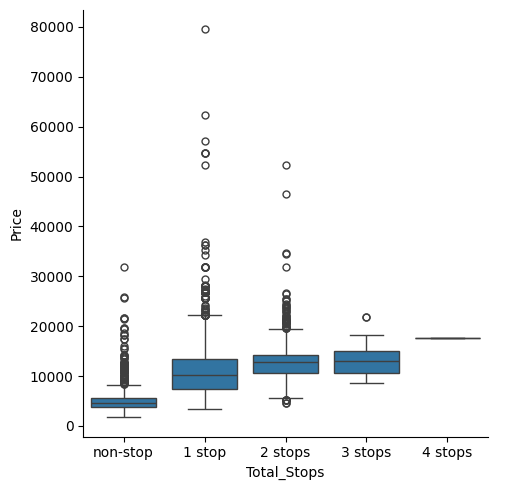

In [234]:
sns.catplot(x='Total_Stops',y='Price',data=df.sort_values('Price'),kind='box')
plt.show()

- we are observe that non-stop has lo price and 4-stops has high price
- It look like a ordinal data so we do ordinal encoding

In [235]:
df['Total_Stops']=df.Total_Stops.map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [236]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_min
0,2053,Banglore,Delhi,0,No info,3897,24,3,22,20,1,10,170
1,1751,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,445


In [237]:
df.Additional_Info.value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [238]:
df['In-flight meal not included']=np.where(df['Additional_Info']=='In-flight meal not included',1,0)
df['No check-in baggage included']=np.where(df['Additional_Info']=='No check-in baggage included',1,0)
df.drop('Additional_Info',axis=1,inplace=True)

In [239]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_min,In-flight meal not included,No check-in baggage included
0,2053,Banglore,Delhi,0,3897,24,3,22,20,1,10,170,0,0
1,1751,Kolkata,Banglore,2,7662,1,5,5,50,13,15,445,0,0


In [240]:
df.drop(['Source','Destination'],axis=1,inplace=True)
df_train=pd.concat([df,Source,Destination],axis=1)

In [241]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Airline                       10682 non-null  int64
 1   Total_Stops                   10682 non-null  int64
 2   Price                         10682 non-null  int64
 3   Day_of_Journey                10682 non-null  int32
 4   Month_of_Journey              10682 non-null  int32
 5   Dep_hour                      10682 non-null  int32
 6   Dep_min                       10682 non-null  int32
 7   Arrival_hour                  10682 non-null  int32
 8   Arrival_min                   10682 non-null  int32
 9   Duration_in_min               10682 non-null  int32
 10  In-flight meal not included   10682 non-null  int32
 11  No check-in baggage included  10682 non-null  int32
 12  Source_Banglore               10682 non-null  int32
 13  Source_Chennai                10682 

# Feature selection
1. heatmap
2. selectKbest
3. feature_importance

Note : Here we not removing any column, cheking which column has more impact with price

## 1.Heatmap

<Axes: >

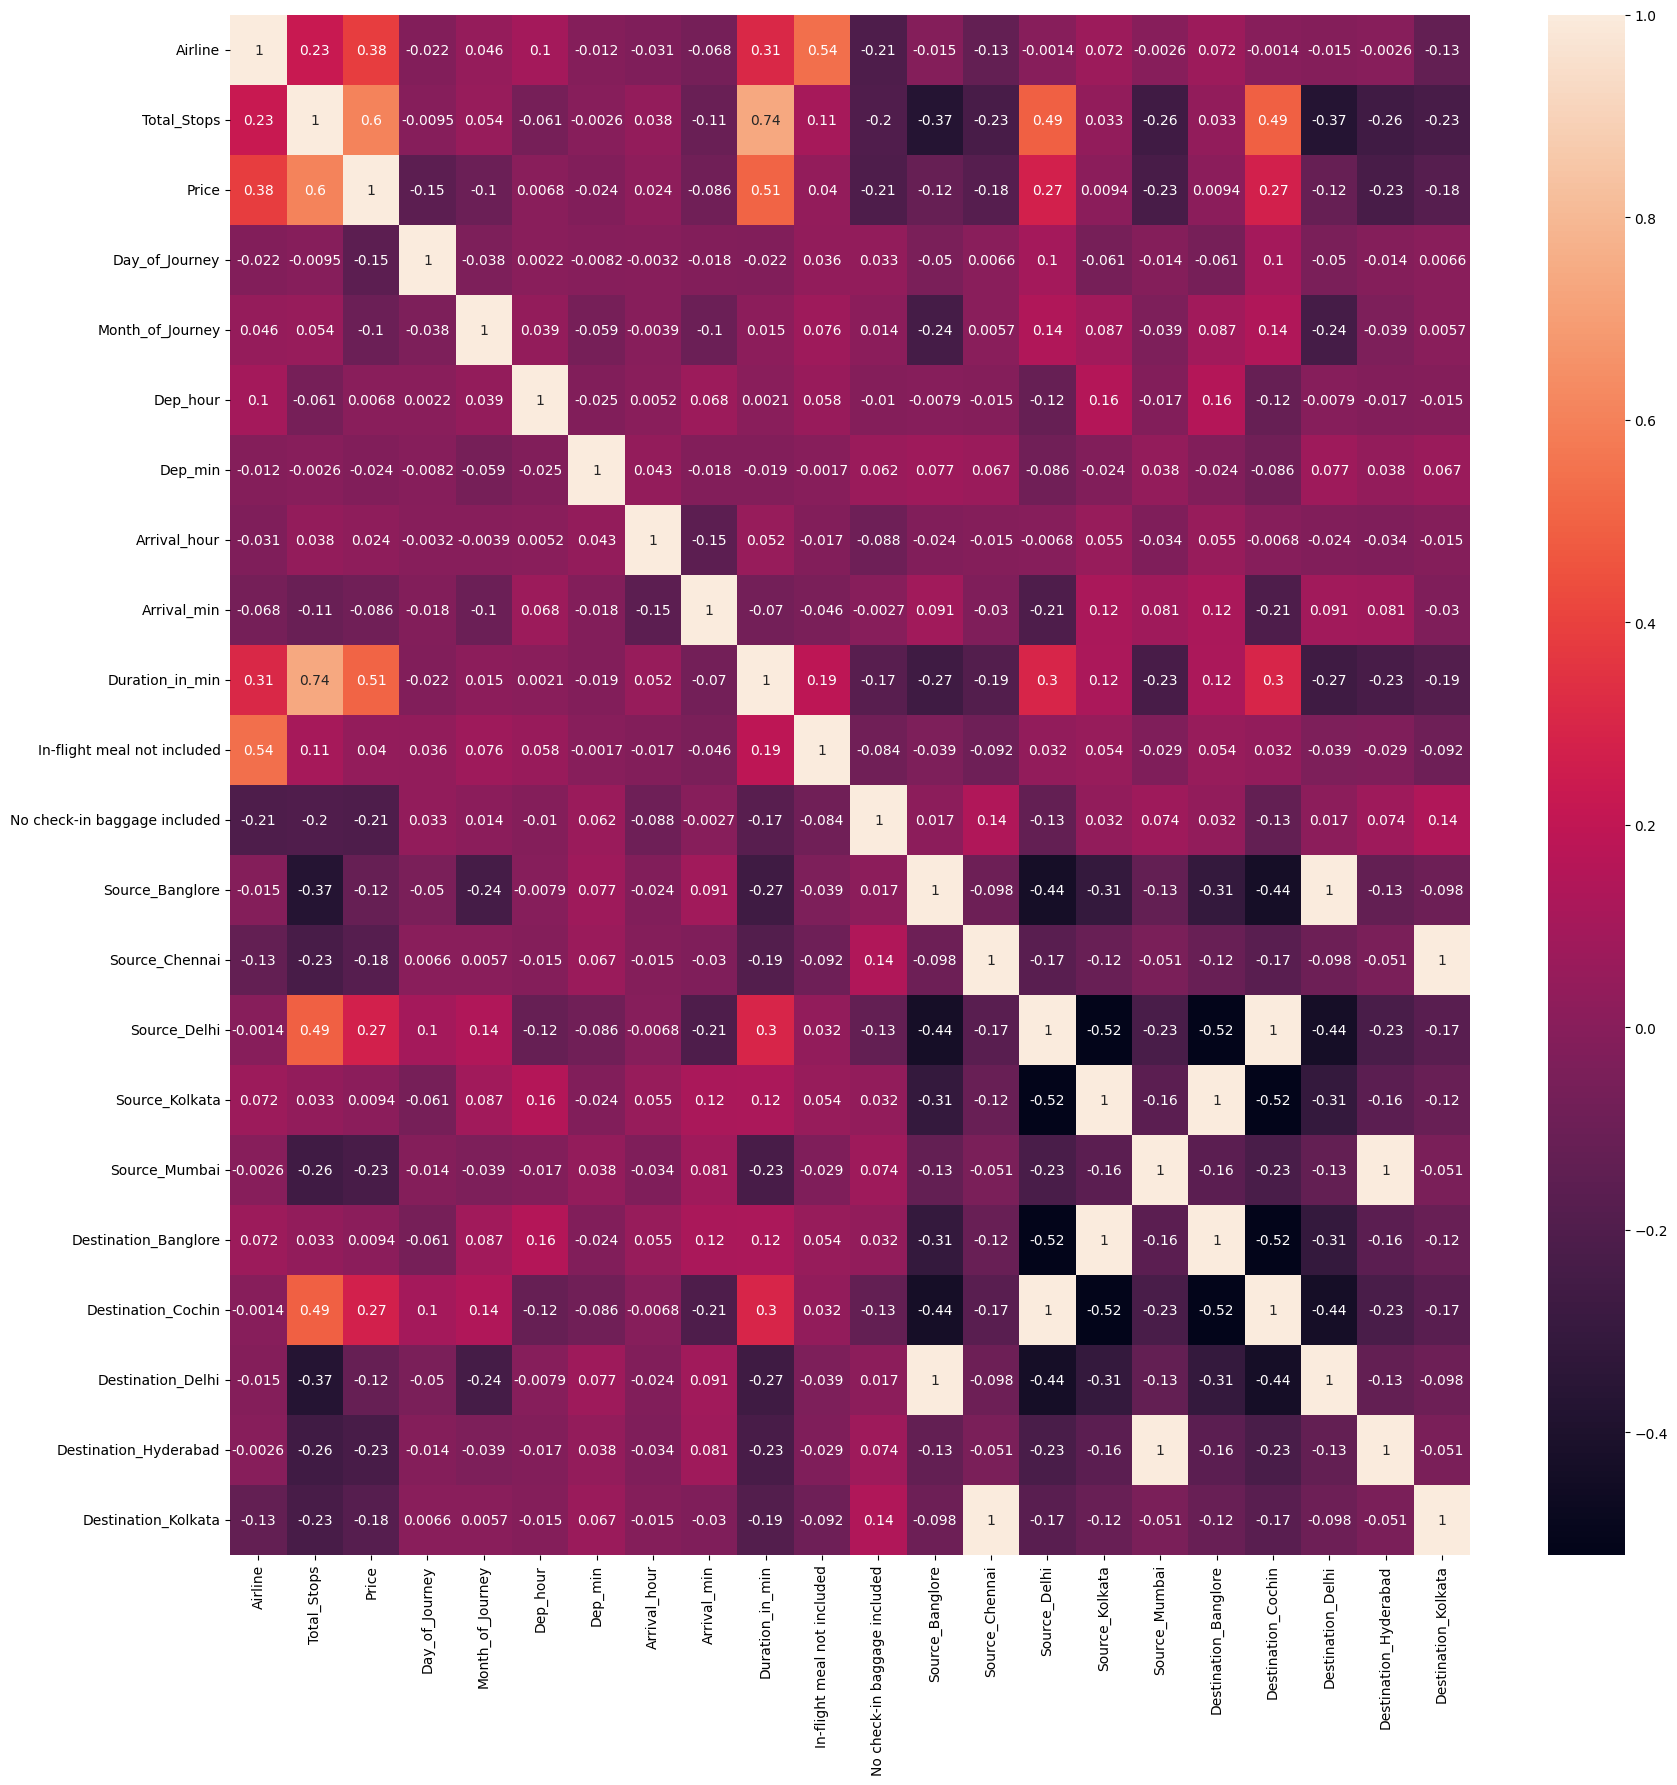

In [242]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(),annot=True)

## 2.SelectKBest

In [243]:
X=df_train.drop('Price',axis=1)
y=df_train.Price

In [244]:
from sklearn.feature_selection import SelectKBest
Select=SelectKBest()
Select.fit(X,y)

SelectKBest()

In [245]:
Select.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False,  True, False,  True,
        True,  True,  True])

In [246]:
Select.get_params()

{'k': 10,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [247]:
Select.get_feature_names_out()

array(['Airline', 'Total_Stops', 'Source_Banglore', 'Source_Chennai',
       'Source_Delhi', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata'], dtype=object)

## 3.ExtraTreesRegressor

In [248]:
# Importent features using ExtratreesRegr
from sklearn.ensemble import ExtraTreesRegressor
Selection=ExtraTreesRegressor()
Selection.fit(X,y)

ExtraTreesRegressor()

In [249]:
Selection.feature_importances_

array([0.1922033 , 0.27258208, 0.11137814, 0.05538227, 0.02662292,
       0.02616347, 0.0309842 , 0.02015866, 0.12157993, 0.07213261,
       0.00089042, 0.01487093, 0.00063233, 0.01230538, 0.00550721,
       0.00414756, 0.00404573, 0.01010372, 0.01201065, 0.00545492,
       0.00084357])

In [250]:
index=X.columns
index

Index(['Airline', 'Total_Stops', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_in_min',
       'In-flight meal not included', 'No check-in baggage included',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata'],
      dtype='object')

<Axes: >

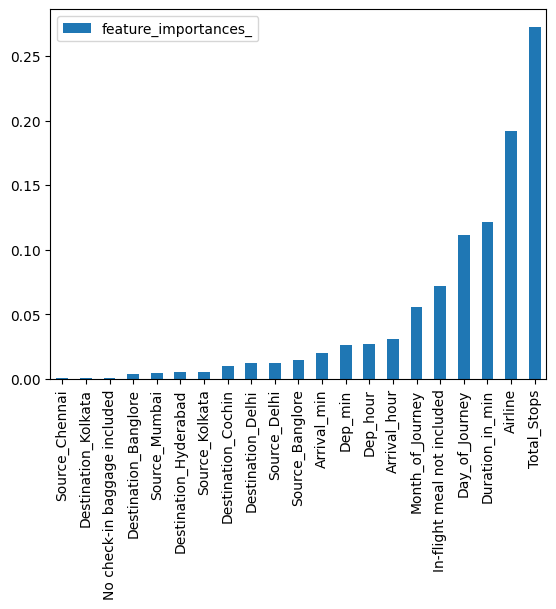

In [251]:
d=pd.DataFrame(Selection.feature_importances_,columns=['feature_importances_'],index=index)
d.sort_values(by='feature_importances_').plot(kind='bar')

# Test data
- data pre_process

In [252]:
df1=pd.read_excel('Test_set.xlsx')
df1.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info


In [253]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [254]:
df.shape

(10682, 12)

# preprocessing for test data

In [255]:
    
def preprocess(df):
    
    # Airline
    df['Airline']=df['Airline'].map(Airline_dict)
    
    # Date_of_Journey
    df['Date_of_Journey']=pd.to_datetime(df.Date_of_Journey,format='mixed')
    df['Day_of_Journey']=df['Date_of_Journey'].dt.day
    df['Month_of_Journey']=df['Date_of_Journey'].dt.month
    
    # Dep_Time
    df['Dep_hour']=pd.to_datetime(df.Dep_Time).dt.hour
    df['Dep_min']=pd.to_datetime(df.Dep_Time).dt.minute
    
    # Arrival_Time
    df['Arrival_hour']=pd.to_datetime(df.Arrival_Time).dt.hour
    df['Arrival_min']=pd.to_datetime(df.Arrival_Time).dt.minute
    
    # Duration
    duration_list=list(df.Duration.values)
    l1=[]
    for duration in duration_list:
        duration=duration.split()
        if len(duration)!=2:
            if 'h' in ''.join(duration):
                l1.append(''.join(duration)+' '+'0m')
            else:
                l1.append('0h'+' '+''.join(duration))
        else:
            l1.append(' '.join(duration))
    df['Duration']=l1
    df['Duration_Hour']=df.Duration.str.replace('h','').str.replace('m','').str.split().str[0].astype(int)
    df['Duration_min']=df.Duration.str.replace('h','').str.replace('m','').str.split().str[1].astype(int)
    df['Duration_in_min']=df.Duration_Hour*60+df.Duration_min
    
    # Source
    Source=pd.get_dummies(df[['Source']],dtype=int)
    
    # Destination
    df['Destination']=np.where(df.Destination=='New Delhi','Delhi',df.Destination)
    Destination=pd.get_dummies(df[['Destination']],dtype=int)
    
    # Total_Stops
    df['Total_Stops']=df.Total_Stops.map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})
    
    # Additional_Info
    df['In-flight meal not included']=np.where(df['Additional_Info']=='In-flight meal not included',1,0)
    df['No check-in baggage included']=np.where(df['Additional_Info']=='No check-in baggage included',1,0)
    
    # doping unwanted columns
    df.drop(['Date_of_Journey','Arrival_Time',
             'Dep_Time','Duration_Hour',
             'Duration_min','Duration',
             'Route','Source','Destination',
             'Additional_Info'],axis=1,inplace=True)
    df_test=pd.concat([df,Source,Destination],axis=1)
    return df_test
    

In [256]:
df_test=preprocess(df1)

In [257]:
df_test

,Airline,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_min,In-flight meal not included,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,3849,1,6,6,17,30,4,25,655,0,...,0,0,1,0,0,0,1,0,0,0
1,2053,1,5,12,6,20,10,20,240,0,...,0,0,0,1,0,1,0,0,0,0
2,3849,1,21,5,19,15,19,0,1425,1,...,0,0,1,0,0,0,1,0,0,0
3,1196,1,21,5,8,0,21,0,780,0,...,0,0,1,0,0,0,1,0,0,0
4,319,0,24,6,23,55,2,45,170,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1751,1,6,6,20,30,20,25,1435,0,...,0,0,0,1,0,1,0,0,0,0
2667,2053,0,27,3,14,20,16,55,155,0,...,0,0,0,1,0,1,0,0,0,0
2668,3849,1,3,6,21,50,4,25,395,0,...,0,0,1,0,0,0,1,0,0,0
2669,1751,1,3,6,4,0,19,15,915,0,...,0,0,1,0,0,0,1,0,0,0


### Train Test split

In [258]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [259]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8545, 21)
(8545,)
(2137, 21)
(2137,)


# Model building

In [260]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor()

In [261]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [262]:
from sklearn.ensemble import AdaBoostRegressor
AD=AdaBoostRegressor()
AD.fit(X_train,y_train)

AdaBoostRegressor()

## predictions

In [263]:
RF_predict=RF.predict(X_test)
lr_predict=lr.predict(X_test)
AD_predict=AD.predict(X_test)

# Evalution metrics
- mean_squared_error
- mean_absolute_error
- r2_score....etc

In [264]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [265]:
def report(y_predict):
    r2=round(r2_score(y_predict,y_test),2)
    # adj_r2=1-(1-r2)*(n-1)/(n-1-k)
    adj_r2=round(1-(1-r2)*(len(y)-1)/(len(y)-1-(X.shape[1]-1)),2)
    MAE=mean_absolute_error(y_predict,y_test)
    RMSE=np.sqrt(mean_squared_error(y_predict,y_test))
    MSE=mean_squared_error(y_predict,y_test)
    return [r2,adj_r2, RMSE,MSE,MAE]

In [266]:
rf_report=report(RF_predict)
lr_report=report(lr_predict)
ad_report=report(AD_predict)
pd.DataFrame(zip(rf_report,lr_report,ad_report),
             columns=['RandomForestRegressor','LinearRegression','AdaBoostRegressor'],
             index=['r2','adj_r2','RMSE','MSE','MAE'])

,RandomForestRegressor,LinearRegression,AdaBoostRegressor
r2,8.700000e-01,-5.000000e-02,-4.400000e-01
adj_r2,8.700000e-01,-5.000000e-02,-4.400000e-01
RMSE,1.653375e+03,3.411836e+03,4.029491e+03
MSE,2.733650e+06,1.164063e+07,1.623680e+07
MAE,7.005217e+02,2.193383e+03,3.146157e+03


<Axes: xlabel='Price', ylabel='Density'>

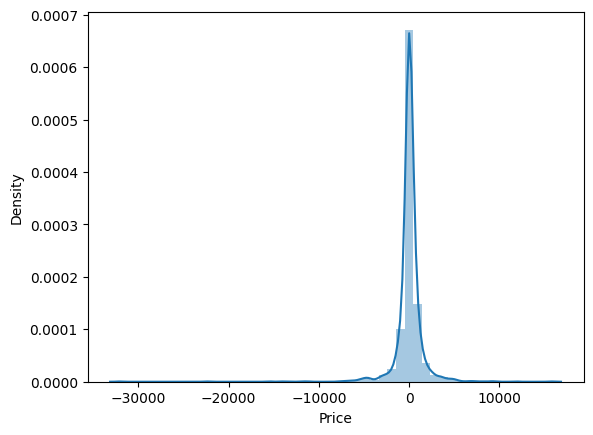

In [267]:
sns.distplot(RF_predict-y_test)

<Axes: xlabel='Price'>

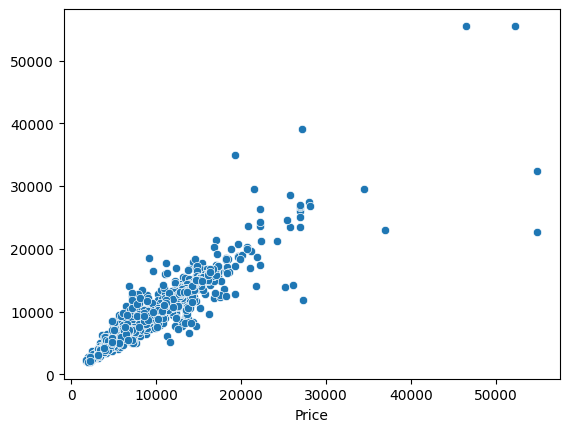

In [268]:
sns.scatterplot(x=y_test,y=RF_predict)

# save the model
- pickle
- save the model in local

In [269]:
import pickle
pickle.dump(RF,open('RF_model.pkl','wb'))

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Airline                       10682 non-null  int64
 1   Total_Stops                   10682 non-null  int64
 2   Price                         10682 non-null  int64
 3   Day_of_Journey                10682 non-null  int32
 4   Month_of_Journey              10682 non-null  int32
 5   Dep_hour                      10682 non-null  int32
 6   Dep_min                       10682 non-null  int32
 7   Arrival_hour                  10682 non-null  int32
 8   Arrival_min                   10682 non-null  int32
 9   Duration_in_min               10682 non-null  int32
 10  In-flight meal not included   10682 non-null  int32
 11  No check-in baggage included  10682 non-null  int32
dtypes: int32(9), int64(3)
memory usage: 709.4 KB


In [271]:
df_train.columns

Index(['Airline', 'Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_in_min',
       'In-flight meal not included', 'No check-in baggage included',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata'],
      dtype='object')